# IML Assignment 1

## Name: Almaz Dautov
## mail: a.dautov@innopolis.univeristy

## Task 1

### Linear Regression
#### Data reading & plotting

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv("task1_data.csv")
df.head()

,X_train,y_train,X_test,y_test
0,0.136018,-0.129555,0.000000,0.000000
1,0.207231,0.894330,0.172414,0.270000
2,0.246135,-0.791176,0.344828,0.535057
3,0.298175,0.180217,0.517241,0.790317
4,0.635941,3.722585,0.689655,1.031108


In [5]:
X_train, y_train, X_test, y_test = df["X_train"], df["y_train"], df["X_test"], df["y_test"]

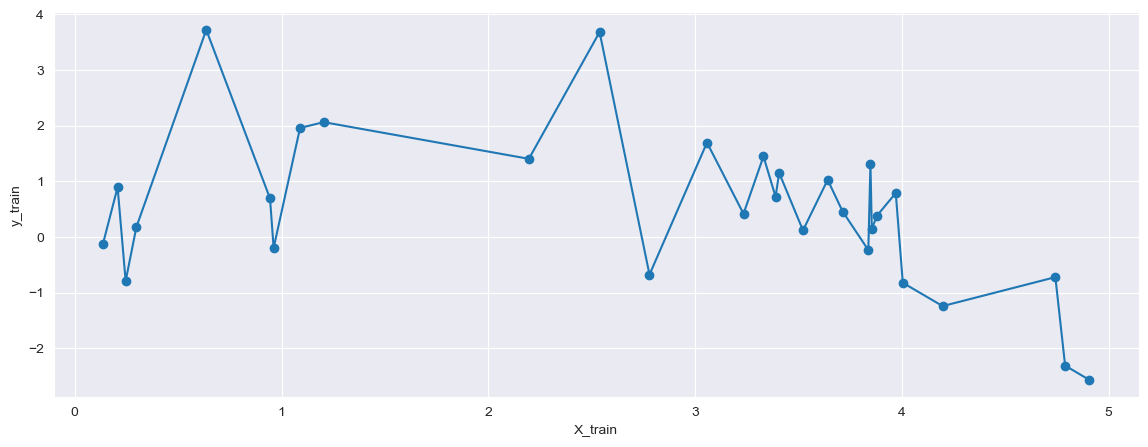

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_train, y_train, marker = 'o')
plt.xlabel("X_train")
plt.ylabel("y_train")

plt.show()

#### Linear regression model fitting

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### Linear regression model prediction & Evaluation


In [8]:
from sklearn import metrics
def print_metrics(y_actual, y_pred):
    print("Mean Absolute Error: ", metrics.mean_absolute_error(y_actual, y_pred))
    print("Mean Squared Error: ", metrics.mean_squared_error(y_actual, y_pred))
    print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
    print("R2 score: ", metrics.r2_score(y_actual, y_pred))

In [9]:
print_metrics(y_test, y_pred_lr)

Mean Absolute Error:  0.783761030241441
Mean Squared Error:  0.78105677092199
Root Mean Squared Error:  0.8837741628504365
R2 score:  0.2609450135378707


 #### Plotting original data and prediction


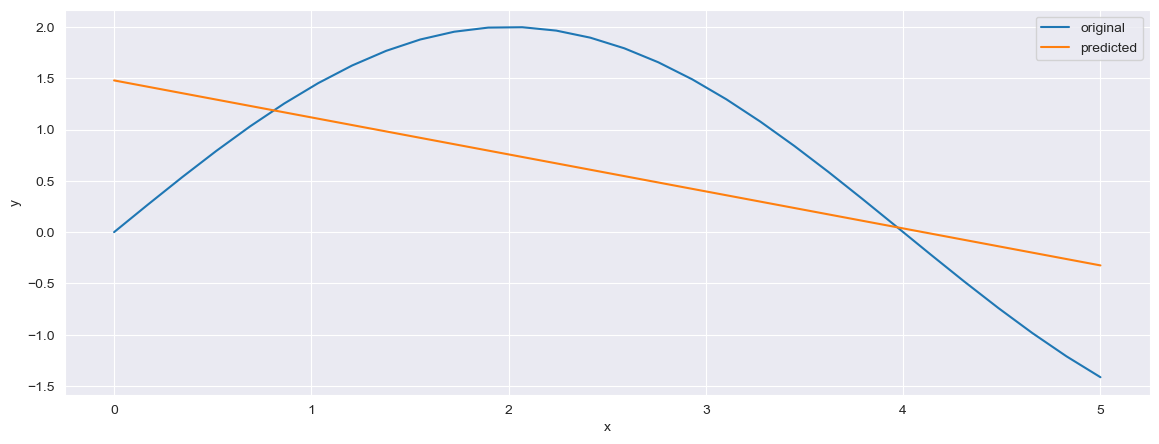

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="original")
plt.plot(X_test, y_pred_lr, label="predicted")

plt.xlabel("x")
plt.ylabel("y")

plt.legend(loc="best")
plt.show()

#### Did the linear regression model give a good fit? Elaborate your answer

Answer: Despite the fact that MAE, MSE and RMSE show a very small error, R2 is low which is an indication of a high bias model. We can say that our model is underfitting.


### Polynomial Regression
#### Constructing the polynomial regression pipeline

In [11]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [12]:
pipeline = Pipeline([
    ("transformer", PolynomialFeatures()),
    ("estimator", LinearRegression()),
])

#### Tuning the degree hyper-parameter using GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV

degrees = np.arange(2, 10)
parameters = {"transformer__degree": degrees}

search = GridSearchCV(pipeline, parameters, cv=8, scoring="neg_mean_squared_error")

x = np.array(X_train).reshape(-1, 1)

search.fit(x, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-1.078):
{'transformer__degree': 2}


In [14]:
print_metrics(y_test, search.predict(X_test))

Mean Absolute Error:  0.15213273421671727
Mean Squared Error:  0.08205877217937993
Root Mean Squared Error:  0.2864590235607528
R2 score:  0.9223539862658873


#### Manually finding the best degree

In [15]:
scores = []
for degree in range(2, 10):
    pipeline = Pipeline([
        ("transformer", PolynomialFeatures(degree= degree)),
        ("estimator", LinearRegression()),
    ])
    scores.append(np.mean(cross_val_score(pipeline, x, y_train, scoring="neg_mean_squared_error", cv=8)))
best_degree = degrees[np.argmax(scores)]
print(f"Best degree: {best_degree}\nCV score = {np.max(scores)}")

Best degree: 2
CV score = -1.078308479723035


#### Plotting the test data and the best degree polynomial model

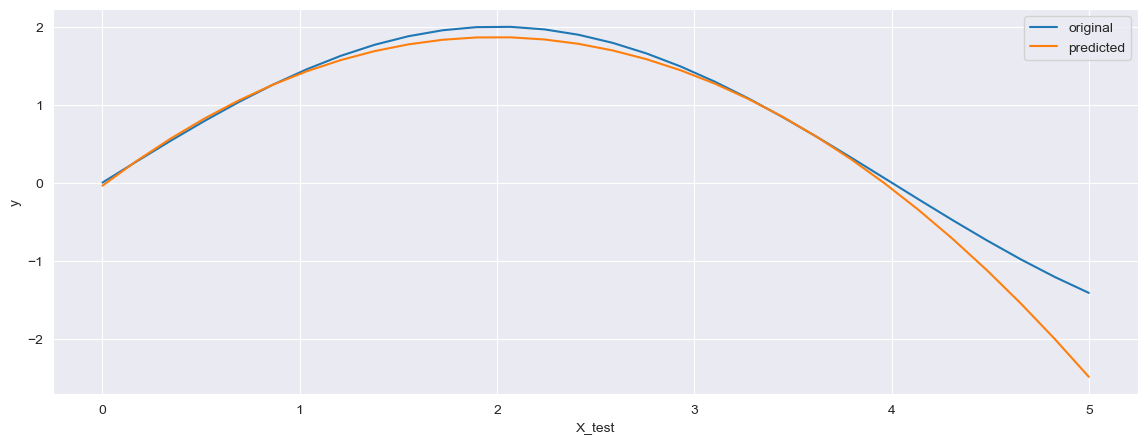

In [16]:
plt.figure(figsize=(14, 5))
plt.plot(X_test, y_test, label="original")
plt.plot(X_test, search.predict(X_test), label="predicted")
plt.xlabel("X_test")
plt.ylabel("y")
plt.legend(loc="best")
plt.show()

## Task 2

### Data processing
#### Loading the dataset

In [17]:
import pandas as pd
df = pd.read_csv("pokemon_modified.csv")
df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,hp,name,percentage_male,type1,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,45,Bulbasaur,88.1,grass,65,65,45,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,60,Ivysaur,88.1,grass,80,80,60,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,80,Venusaur,88.1,grass,122,120,80,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,39,Charmander,88.1,fire,60,50,65,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,...,58,Charmeleon,88.1,fire,80,65,80,19.0,1,0


In [18]:
df.nunique()

against_bug            5
against_dark           5
against_dragon         4
against_electric       6
against_fairy          5
against_fight          6
against_fire           5
against_flying         5
against_ghost          5
against_grass          5
against_ground         6
against_ice            5
against_normal         4
against_poison         6
against_psychic        6
against_rock           5
against_steel          5
against_water          5
attack               114
base_egg_steps        10
base_happiness         6
base_total           203
capture_rate          33
classification       588
defense              109
experience_growth      6
height_m              51
hp                    99
name                 801
percentage_male        7
type1                 17
sp_attack            111
sp_defense            97
speed                113
weight_kg            421
generation             7
is_legendary           2
dtype: int64

#### Remove the 2 redundant features
Since the name of the pokemon does not affect its legendary, we can remove this column. Also, the classification column is redundant since the number of unique values is 588 which is close to the number of rows in the dataset. So, we can remove this column as well.

In [19]:
df = df.drop(["name"], axis= 1)
df = df.drop(["classification"], axis= 1)

X = df.drop(["is_legendary"], axis= 1)

y = df["is_legendary"]

#### Splitting the data
random_state = 123, use stratify, test_size = 0.2

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 123)

Check if the dataset is balanced or not and comment on it

In [21]:
print("Number of non-legendary pokemon: ", len(df[df["is_legendary"] == 0]) / len(df))

Number of non-legendary pokemon:  0.9126092384519351


The dataset is imbalanced because it mostly contains non-legendary Pokemon. This can be a problem for the model because it will be biased towards the majority class.

#### Exploring the dataset and checking for missing values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   against_bug        801 non-null    float64
 1   against_dark       801 non-null    float64
 2   against_dragon     801 non-null    float64
 3   against_electric   801 non-null    float64
 4   against_fairy      801 non-null    float64
 5   against_fight      801 non-null    float64
 6   against_fire       801 non-null    float64
 7   against_flying     801 non-null    float64
 8   against_ghost      801 non-null    float64
 9   against_grass      801 non-null    float64
 10  against_ground     801 non-null    float64
 11  against_ice        801 non-null    float64
 12  against_normal     801 non-null    float64
 13  against_poison     801 non-null    float64
 14  against_psychic    801 non-null    float64
 15  against_rock       801 non-null    float64
 16  against_steel      801 non

In [23]:
df.isnull().sum()[df.isnull().sum() > 0]

height_m           20
percentage_male    98
weight_kg          20
dtype: int64

#### Impute the missing values

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(X)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

#### Double check that there are no missing values

In [25]:
pd.DataFrame(X_train).isnull().sum().sum(), pd.DataFrame(X_test).isnull().sum().sum()

(0, 0)

#### Encode categorically

In [26]:
from sklearn.preprocessing import OneHotEncoder

X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

ohe = OneHotEncoder()

X.dtypes[X.dtypes == "object"]

type1    object
dtype: object

In [27]:
transformed = ohe.fit_transform(X_train[['type1']])
X_train[ohe.categories_[0]] = transformed.toarray()
X_train = X_train.drop(['type1'], axis= 1)
X_train

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,1.0,1.0,1.0,2.0,1.0,2.0,0.25,0.5,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,1.0,1.0,0.5,0.5,0.5,1.0,2.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
636,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
637,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,1.0,1.0,1.0,0.0,1.0,0.5,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
transformed = ohe.fit_transform(X_test[['type1']])
X_test[ohe.categories_[0]] = transformed.toarray()
X_test = X_test.drop(['type1'], axis= 1)
X_test

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,ghost,grass,ground,ice,normal,poison,psychic,rock,steel,water
0,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,1.0,2.0,0.5,1.0,0.5,0.5,1.0,1.0,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
157,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
158,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Scale the data

In [29]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()


x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

x_train

array([[0.2       , 0.2       , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.2       , 0.46666667, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.5       , ..., 0.        , 0.        ,
        0.        ]])

#### Correlation Matrix

Are there highly co-related features in the dataset?
Answer: Yes, there are highly correlated features in the dataset. For example, the "base_total" and "sp_attack", "base_total" and "attack", "base_total" and "sp_defence" features are highly correlated. We can remove some of these features to reduce the dimensionality of the dataset.

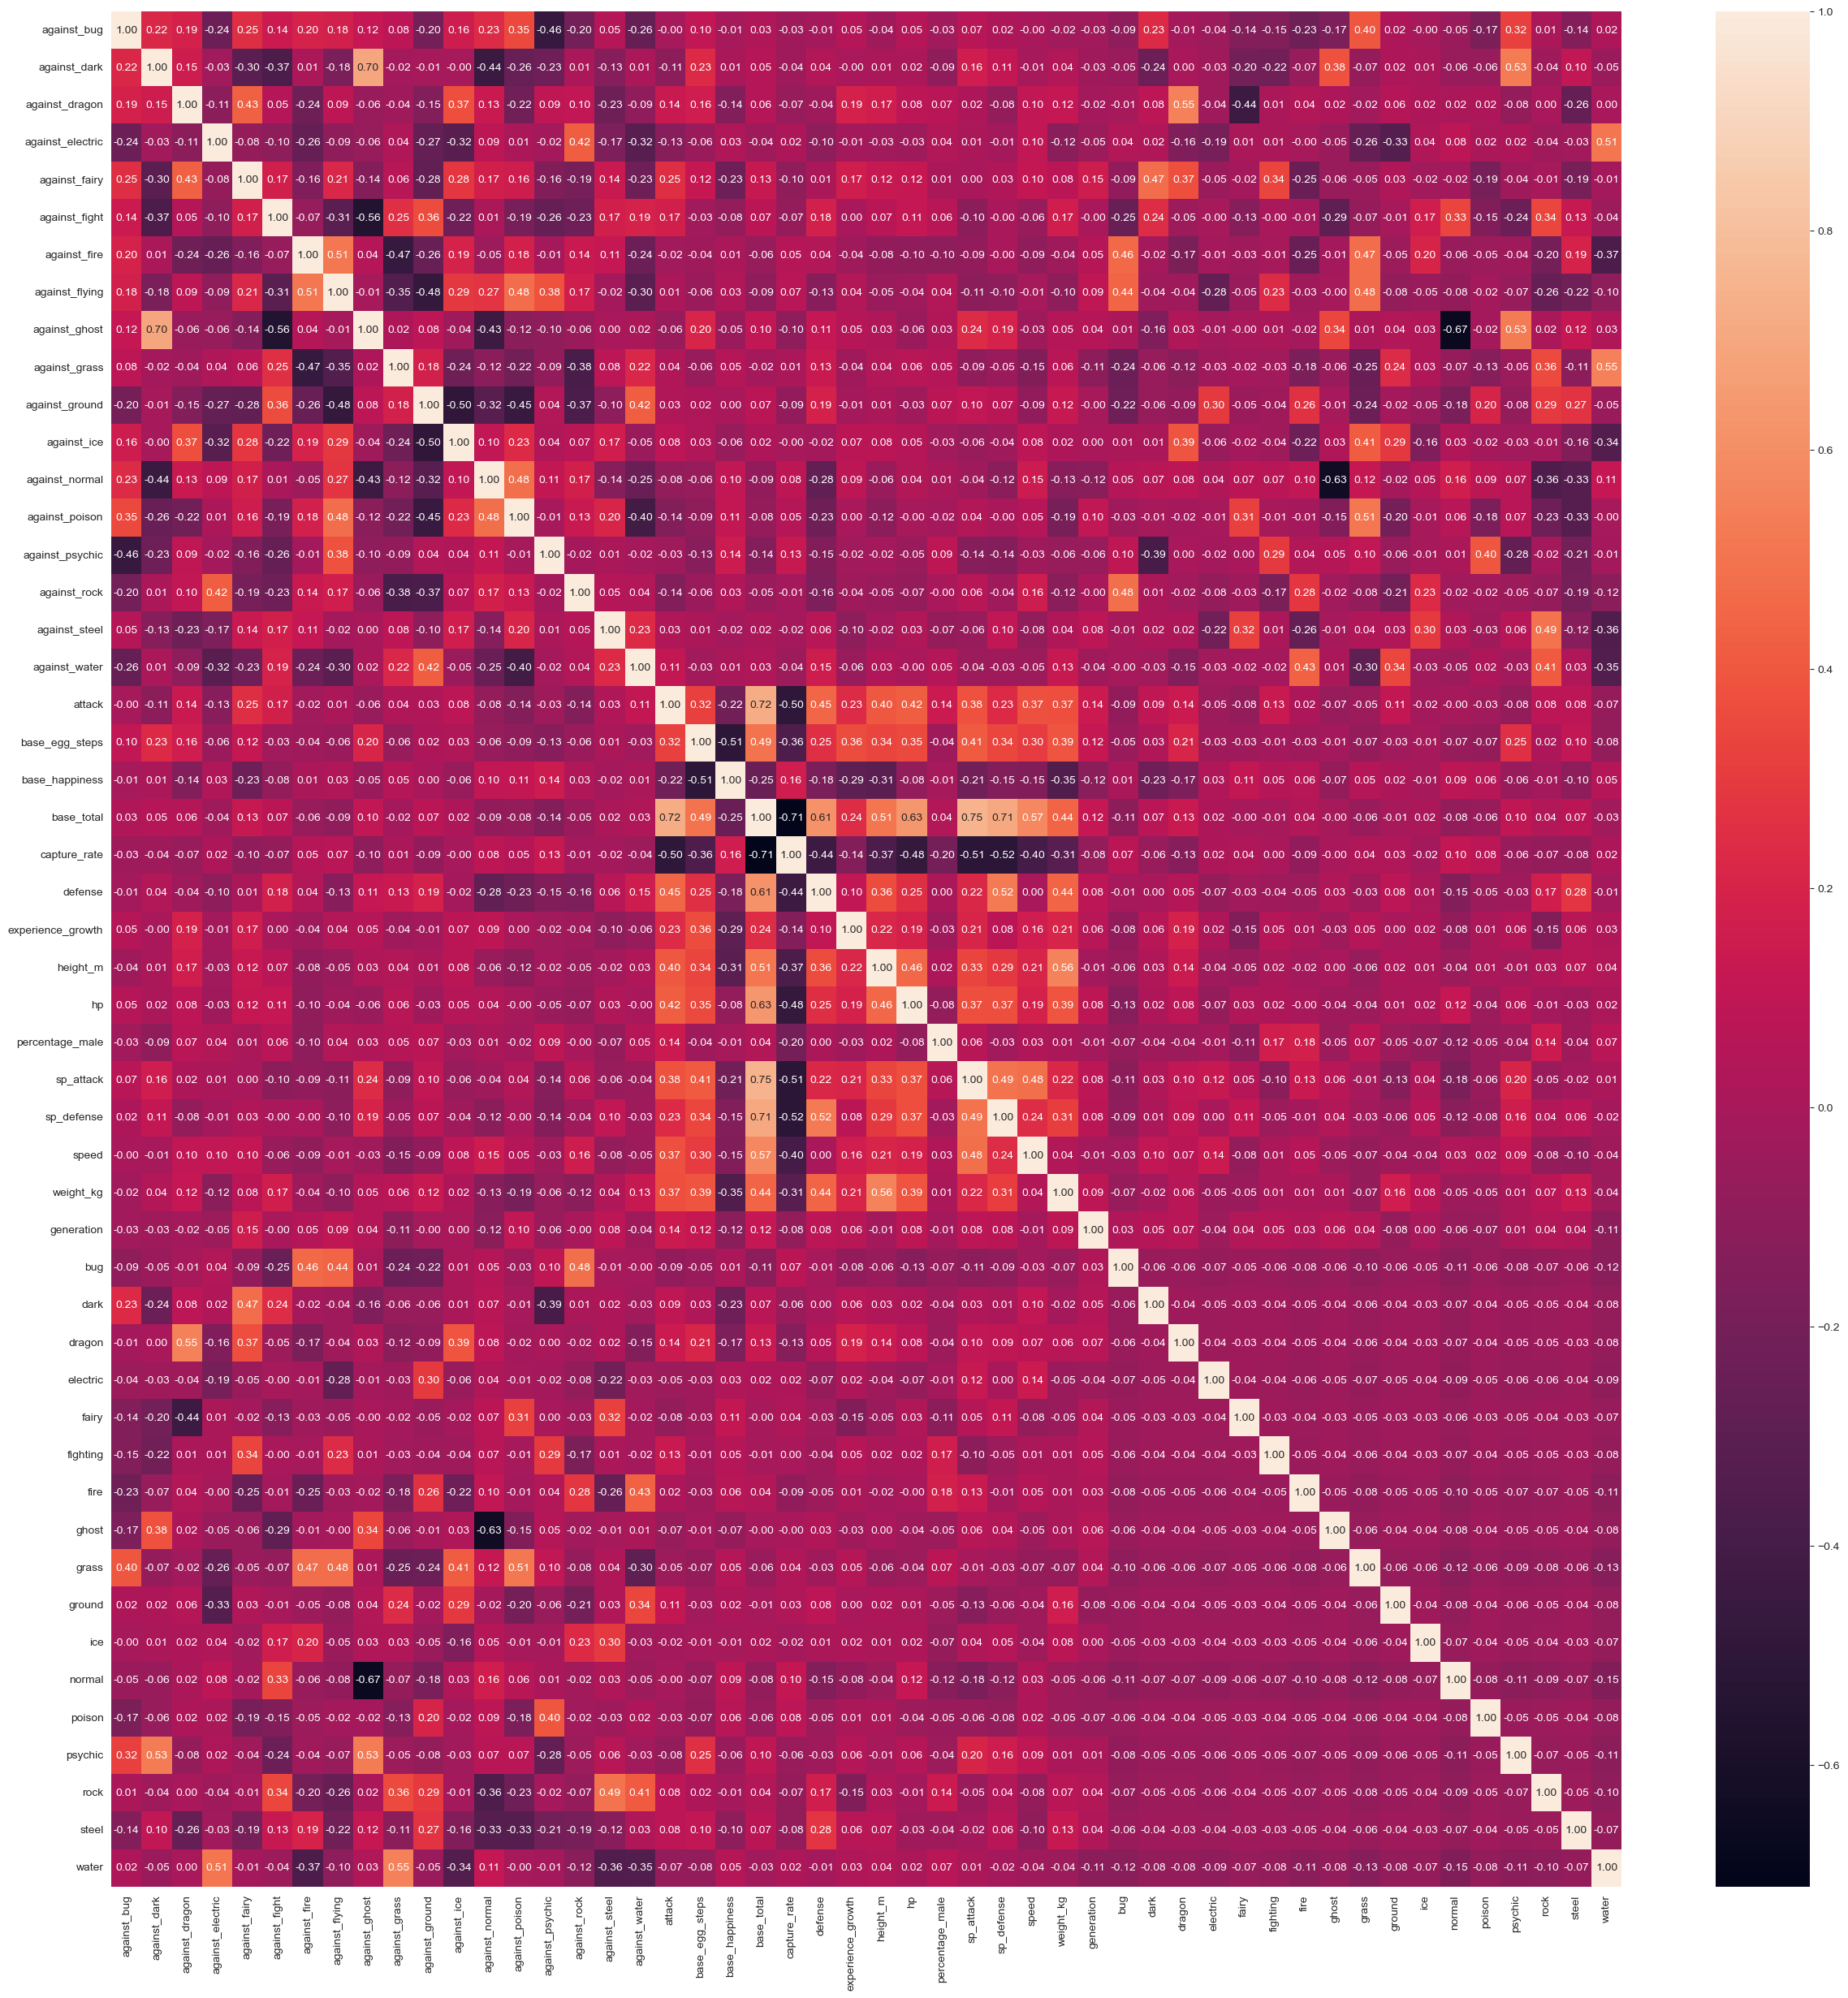

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 30))
sns.heatmap(pd.DataFrame(x_train, columns= X_train.columns).corr(), annot=True, fmt=".2f")
plt.show()


In [31]:
x_train = pd.DataFrame(x_train, columns= X_train.columns)
x_test = pd.DataFrame(x_test, columns= X_test.columns)
x_train = x_train.drop(["sp_attack",  "sp_defense"], axis= 1)
x_test = x_test.drop(["sp_attack", "sp_defense"], axis= 1)

### Model fitting and Comparison

#### Tuning LR model

In [32]:
def print_clf_metrics( y_actual, y_pred):
    print("Accuracy: ", metrics.accuracy_score(y_actual, y_pred))
    print("Precision: ", metrics.precision_score(y_actual, y_pred))
    print("Recall: ", metrics.recall_score(y_actual, y_pred))
    print("F1 Score: ", metrics.f1_score(y_actual, y_pred))


In [33]:
parameters = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["liblinear", "newton-cg", "lbfgs"],
}

max_iter=1000 in LR constructor

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

gs_clf = GridSearchCV(LogisticRegression(max_iter=1000), parameters, cv=8)

In [35]:
gs_clf.fit(x_train, y_train)


GridSearchCV(cv=8, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']})

In [36]:
print("Tuned Hyperparameters :", gs_clf.best_params_)
print("Accuracy :", gs_clf.best_score_)

Tuned Hyperparameters : {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9890625


#### Construct a LR with the best params and Evaluate the LR with the best params

In [37]:
lr_clf = LogisticRegression(C=gs_clf.best_params_["C"], penalty=gs_clf.best_params_["penalty"], solver=gs_clf.best_params_["solver"], max_iter=1000)

In [38]:
lr_clf = lr_clf.fit(x_train, y_train)

In [39]:
print_clf_metrics(y_test, lr_clf.predict(x_test))

Accuracy:  0.9937888198757764
Precision:  0.9333333333333333
Recall:  1.0
F1 Score:  0.9655172413793104


#### Print the top 5 most influencing features and the top 5 ignored features

In [40]:
influencing = X_train.columns[np.argsort(abs(lr_clf.coef_[0]))[-5:]]
ignored = X_train.columns[np.argsort(abs(lr_clf.coef_[0]))[:5]]

print("Top 5 most influencing features: ", influencing.values)
print("Top 5 ignored features: ", ignored.values)



Top 5 most influencing features:  ['experience_growth' 'base_total' 'ground' 'capture_rate' 'base_egg_steps']
Top 5 ignored features:  ['against_bug' 'poison' 'normal' 'ice' 'ghost']


#### Tuning KNN model

In [41]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    "n_neighbors": np.arange(1, 15),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "chebyshev", "cosine"],
}

grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=8)

grid_search_clf.fit(x_train, y_train)

print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'metric': 'cosine', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy : 0.953125


#### Construct a KNN model with the best params and Evaluate the KNN with the best params


In [42]:
knn = KNeighborsClassifier(n_neighbors=grid_search_clf.best_params_["n_neighbors"], weights=grid_search_clf.best_params_["weights"], metric=grid_search_clf.best_params_["metric"])

knn = knn.fit(x_train, y_train)
print_clf_metrics(y_test, knn.predict(x_test))

Accuracy:  0.9751552795031055
Precision:  1.0
Recall:  0.7142857142857143
F1 Score:  0.8333333333333333


#### Fitting GNB to the data and evaluating on the test dataset

In [43]:
from sklearn.naive_bayes import GaussianNB

gauss_nb = GaussianNB()
gauss_nb.fit(x_train, y_train)
y_pred = gauss_nb.predict(x_test)

print_clf_metrics(y_test, y_pred)

Accuracy:  0.8695652173913043
Precision:  0.4
Recall:  1.0
F1 Score:  0.5714285714285715


#### Which metric is most appropriate for this task and why?

Answer: We should use F1 score because we want to have a balance between precision and recall. We want to have a good precision and recall score. F1 score is the harmonic mean of both, so it is the best metric to use in this case.

#### Compare the 3 classifiers in terms of accuracy, precision, recall and F1-score.
What is the best model for this task? and based on what
did you pick it?

Answer: Linear regression is the best model for this task. It has the highest F1 score, which means it has the best precision and recall scores. It also has the highest accuracy score.

In [44]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

metrics_df = metrics_df.append({'Model': 'Logistic Regression', 'Accuracy': metrics.accuracy_score(y_test, lr_clf.predict(x_test)), 'Precision': metrics.precision_score(y_test, lr_clf.predict(x_test)), 'Recall': metrics.recall_score(y_test, lr_clf.predict(x_test)), 'F1 Score': metrics.f1_score(y_test, lr_clf.predict(x_test))}, ignore_index=True)

metrics_df = metrics_df.append({'Model': 'KNN', 'Accuracy': metrics.accuracy_score(y_test, knn.predict(x_test)), 'Precision': metrics.precision_score(y_test, knn.predict(x_test)), 'Recall': metrics.recall_score(y_test, knn.predict(x_test)), 'F1 Score': metrics.f1_score(y_test, knn.predict(x_test))}, ignore_index=True)


metrics_df = metrics_df.append({'Model': 'Gaussian Naive Bayes', 'Accuracy': metrics.accuracy_score(y_test, gauss_nb.predict(x_test)), 'Precision': metrics.precision_score(y_test, gauss_nb.predict(x_test)), 'Recall': metrics.recall_score(y_test, gauss_nb.predict(x_test)), 'F1 Score': metrics.f1_score(y_test, gauss_nb.predict(x_test))}, ignore_index=True)

metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.993789,0.933333,1.000000,0.965517
1,KNN,0.975155,1.000000,0.714286,0.833333
2,Gaussian Naive Bayes,0.869565,0.400000,1.000000,0.571429


## Bonus Task

#### Loading the Dataset

In [45]:
import pandas as pd
train_data = pd.read_csv("bonus_train.csv")

test_data = pd.read_csv("bonus_test.csv")

train_data

,var1,var2,var3,target
0,63.973548,2.726496,379.882305,2
1,10.906092,5.529845,207.272945,1
2,73.482382,2.739803,335.491727,1
3,28.937856,3.666386,226.279807,0
4,33.315477,5.540084,159.608987,0
...,...,...,...,...
265,87.227771,3.738061,320.135382,2
266,-4.605994,3.688628,204.136303,1
267,44.178216,5.085936,198.365089,0
268,6.169277,3.328219,204.934675,0


In [46]:
X_train = train_data.drop(['target'], axis= 1)
y_train = train_data['target']

X_test = test_data.drop(['target'], axis= 1)
y_test = test_data['target']

print(X_train, y_train, X_test, y_test)

          var1      var2        var3
0    63.973548  2.726496  379.882305
1    10.906092  5.529845  207.272945
2    73.482382  2.739803  335.491727
3    28.937856  3.666386  226.279807
4    33.315477  5.540084  159.608987
..         ...       ...         ...
265  87.227771  3.738061  320.135382
266  -4.605994  3.688628  204.136303
267  44.178216  5.085936  198.365089
268   6.169277  3.328219  204.934675
269  -5.396278  4.021390  197.347533

[270 rows x 3 columns] 0      2
1      1
2      1
3      0
4      0
      ..
265    2
266    1
267    0
268    0
269    0
Name: target, Length: 270, dtype: int64           var1      var2        var3
0    26.052523  4.698298  239.765969
1    62.205061  4.373559  207.581273
2    11.390621  4.494386  244.578095
3    35.320556  2.731171  322.284266
4    53.508643  3.575985  247.902236
5    15.608017  3.441529  171.143617
6    34.033739  3.653252  216.465744
7    -2.157290  5.066110  123.714108
8    26.441097  3.839241  195.244416
9   -11.806370  3.91032

####  Plot the data using the pairplot in sns

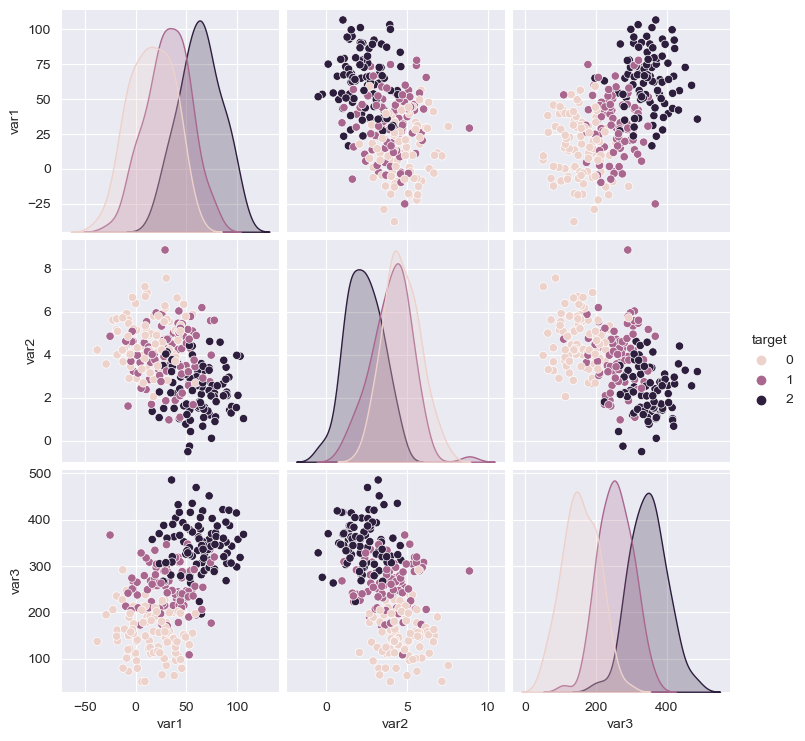

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train_data, hue="target")
plt.show()

#### Fit LR to the training dataset using OVR and evaluate on the test dataset

In [48]:
multi_lr = LogisticRegression(multi_class= 'ovr', max_iter=10000)
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [49]:
print("Accuracy: ", multi_lr.score(X_test, y_test))

Accuracy:  0.8


#### Fit LR to the training dataset using multinomial and evaluate on the test dataset


In [50]:
multi_lr = LogisticRegression(multi_class= 'multinomial', max_iter=10000)
multi_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [51]:
print("Accuracy: ", multi_lr.score(X_test, y_test))

Accuracy:  0.9


#### Using gridsearch to tune the C value and multi class

In [52]:
params = {
    "C": np.logspace(-10, 10, 7),
    "multi_class": ["ovr", "multinomial"],
}

In [53]:
grid_search_clf = GridSearchCV(LogisticRegression(max_iter=10000), params, cv=8)

grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=8, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': array([1.00000000e-10, 2.15443469e-07, 4.64158883e-04, 1.00000000e+00,
       2.15443469e+03, 4.64158883e+06, 1.00000000e+10]),
                         'multi_class': ['ovr', 'multinomial']})

In [54]:
print("Tuned Hyperparameters :", grid_search_clf.best_params_)
print("Accuracy :", grid_search_clf.best_score_)

Tuned Hyperparameters : {'C': 0.0004641588833612782, 'multi_class': 'multinomial'}
Accuracy : 0.82174688057041


In [55]:
grid_search_clf.best_estimator_

LogisticRegression(C=0.0004641588833612782, max_iter=10000,
                   multi_class='multinomial')

#### Comment on why one multi_class technique was better than the other
Answer: The multinomial technique is better than the ovr technique because it has a higher accuracy score. It has higher accuracy since OvR treat each category as if it were binary, which can lead to some loss of information, in contrast multinomial logistic regression model the probabilities of all categories simultaneously and used the softmax function to predict if a single data point falls in one of the  'N' classes. This can lead to better parameter estimates and more accurate predictions.

#### Create LR with the best params

In [56]:
multi_lr = LogisticRegression(C=0.0004641588833612782, max_iter=10000,
                              multi_class='multinomial')

#### Visualize the decision boundaries

In [57]:
from mlxtend.plotting import plot_decision_regions

X_train = X_train[['var1', 'var3']]
multi_lr = multi_lr.fit(X_train, y_train)
plot_decision_regions(X_train.values, y_train.values, clf=multi_lr, legend=2)
plt.xlabel('var1')
plt.ylabel('var3')
plt.title('Logistic Regression decision boundary')
plt.show()

ModuleNotFoundError: No module named 'mlxtend'

#### Comment on the decision boundary, do you think this is a good model or not? and based on what?
Answer: I think this is a good model, because it has a high accuracy score, and it has a good decision boundary. Although the outliers are exist in the dataset, the model able to classify the points correctly.